In [22]:
# import library needed
import os            # for opening file or directory
import pandas as pd  # for load and process raw dataset
import numpy as np   # for numerical calculation
import random        # for making random number
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix # for scatter plotting visualization

In [23]:
iris_dataset = data = pd.read_csv("C:/Users/LENOVO/Downloads/iris.csv")
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
iris_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


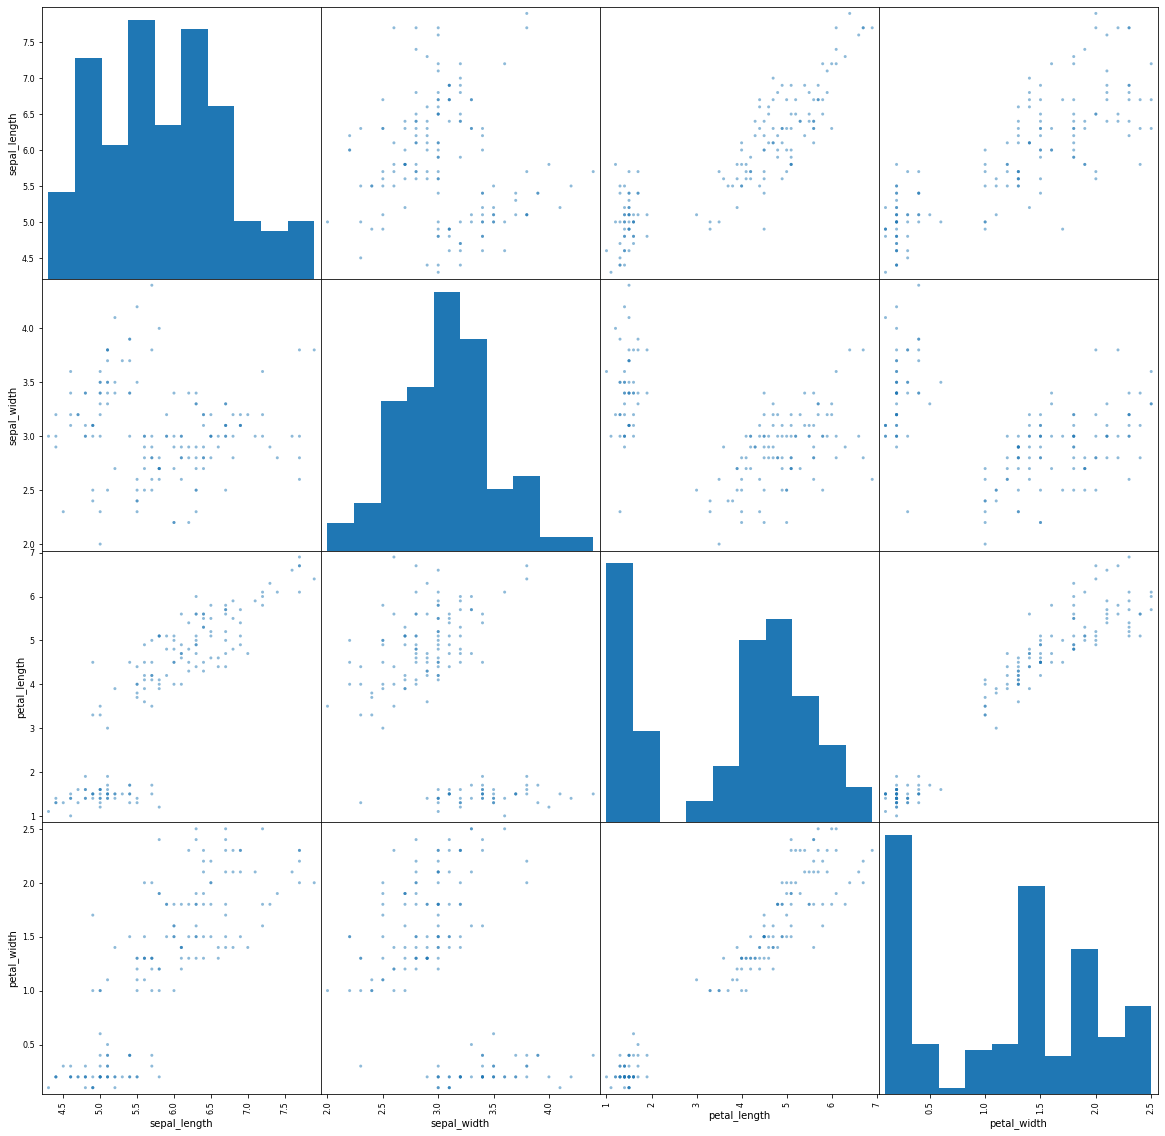

In [25]:
scatter_matrix(iris_dataset, alpha=0.5, figsize=(20, 20))
plt.show()

In [26]:
#into categorical

print('[INFO] create numeric classes for species (0,1,2) ...')

iris_dataset.loc[iris_dataset['species']=='setosa','species']=0
iris_dataset.loc[iris_dataset['species']=='versicolor','species']=1
iris_dataset.loc[iris_dataset['species']=='virginica','species'] = 2

iris_label = np.array(iris_dataset['species'])
iris_data = np.array(iris_dataset[['sepal_length','sepal_width',
                                'petal_length', 'petal_width']])

[INFO] create numeric classes for species (0,1,2) ...


In [27]:
#Spliting dataset into training and testing

random.seed(123)

def separate_data():
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

print('[INFO] separate data to train data and test data')
iris_dataset = np.column_stack((iris_data,iris_label.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)
Filetrain, Filetest = separate_data()

train_X = np.array([i[:4] for i in Filetrain]).astype('float')
train_y = np.array([i[4] for i in Filetrain]).astype('float')
test_X = np.array([i[:4] for i in Filetest]).astype('float')
test_y = np.array([i[4] for i in Filetest]).astype('float')

[INFO] separate data to train data and test data


In [28]:
print('train data shape: ', train_X.shape)
print('test data shape: ', test_X.shape)
print('train label shape: ', train_y.shape)
print('test label shape: ', test_y.shape)

train data shape:  (120, 4)
test data shape:  (30, 4)
train label shape:  (120,)
test label shape:  (30,)


In [29]:
#MLP processing

# Define MLP Class Object
class MultiLayerPerceptron: 
    def __init__(self, params=None):
        # Defaulf MLP Layer if not specify
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.BiasHiddenValue = -1                  # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.activation['sigmoid'] # Activation function
            self.deriv = self.deriv['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epochs']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.activation[params['ActivationFunction']]
            self.deriv = self.deriv[params['ActivationFunction']]
        
        # Initialize Weight and Bias value
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    # Define activation and derivation function based on Mathematical formula
    activation = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x * 1.0))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    deriv = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
    
    # Define Backpropagation process algoritm
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        
        # Stage 1 - Error: OutputLayer
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        
        # Stage 2 - Update weights OutputLayer and HiddenLayer
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        # Stage 3 - Error: HiddenLayer
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        # Stage 4 - Update weights HiddenLayer and InputLayer(x)
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
    
    # Function for plotting error value for each epoch
    def show_err_graphic(self,v_error,v_epoch):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoch, v_error, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()
    
    # Define predict function for prediction test data
    def predict(self, X, y):
        my_predictions = []
        
        # Just doing Forward Propagation
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        # Print predicted value    
        print(" Number of Sample  | Class |  Output  | Hoped Output")   
        for i in range(len(my_predictions)):
            if(my_predictions[i] == 0): 
                print("id:{}    | Iris-Setosa  |  Output: {} | Hoped Output:{}  ".format(i, my_predictions[i], y[i]))
            elif(my_predictions[i] == 1): 
                print("id:{}    | Iris-Versicolour    |  Output: {} | Hoped Output:{} ".format(i, my_predictions[i], y[i]))
            elif(my_predictions[i] == 2): 
                print("id:{}    | Iris-Iris-Virginica   |  Output: {} | Hoped Output:{} ".format(i, my_predictions[i], y[i]))
                
        return my_predictions
        pass

    # Define fit function for training process with train data
    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X);
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                
                # Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                
                # Stage 2 - One-Hot-Encoding
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                # Backpropagation : Update Weights
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            
            # Print error value for each epoch
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
            
        self.show_err_graphic(error_array,epoch_array)
        
        # Print weight Hidden layer acquire during training
        print('')
        print('weight value of Hidden layer acquire during training: ')
        print(W0[0])
        
        # Plot weight Output layer acquire during training
        print('')
        print('weight value of Output layer acquire during training: ')
        print(W1[0])

        return self

Epoch  1 - Total Error:  0.0893635715002401
Epoch  50 - Total Error:  0.053725282357467645
Epoch  100 - Total Error:  0.037678300466887256
Epoch  150 - Total Error:  0.031150650050135013
Epoch  200 - Total Error:  0.028400763121875304
Epoch  250 - Total Error:  0.026684640459743395
Epoch  300 - Total Error:  0.02523095496911937
Epoch  350 - Total Error:  0.02383533441803151
Epoch  400 - Total Error:  0.022422161169091452
Epoch  450 - Total Error:  0.02096794197543499
Epoch  500 - Total Error:  0.019480678845146756
Epoch  550 - Total Error:  0.017973271213314133
Epoch  600 - Total Error:  0.016422907059039912
Epoch  650 - Total Error:  0.014827759472965859
Epoch  700 - Total Error:  0.013362750473605812


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22808\2616257231.py:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoch, v_error, "m-",color="b", marker=11)


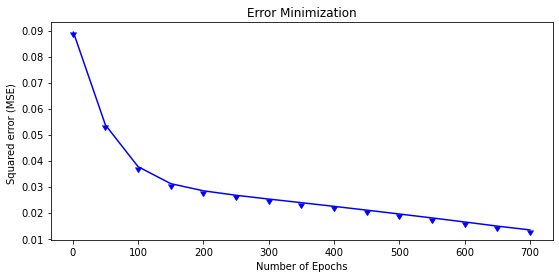


weight value of Hidden layer acquire during training: 
[[-1.2144479901761822, -1.0237235867746795, 1.1593402180504835, -0.9510205697571236, 0.2128240039895382], [-1.8283085349202584, -0.6174988029663124, 0.8822982250033892, 0.10538148610868105, 0.562378240759832], [2.37699594098342, 2.673320503208612, -1.894680865067092, -0.22637674368742985, -0.9738675597590228], [0.8274442502250032, 0.544902904567468, -0.4176102462987161, 0.6713496504613647, -0.26302362790003486]]

weight value of Output layer acquire during training: 
[[-1.7322627770013834, -2.966554509190818, 2.091391511704858], [-3.4584624952158083, 1.6162436967707128, 0.9452808698855688], [1.6823684352932091, -0.1212316109758279, -3.5380018708023675], [-0.0375538121000517, 0.41622361402886415, 0.3578457233660534], [1.0482412731742237, -1.8167493762545257, -1.618864808162196]]


In [30]:
#Train MLP Model using train data
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epochs':700, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [31]:
#Predict Test Data using MLP Model

pred = Perceptron.predict(test_X,test_y)

pred = np.array(pred)
true = test_y.astype('int')

def compute_confusion_matrix(true, pred):
    '''
    Computes a confusion matrix using numpy for two np.arrays
    true and pred.Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"
    However, this function avoids the dependency on sklearn.
    '''
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))
    
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    
    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confussion matrix result: ')
print(conf_matrix)

 Number of Sample  | Class |  Output  | Hoped Output
id:0    | Iris-Setosa  |  Output: 0 | Hoped Output:0.0  
id:1    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:2    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:3    | Iris-Setosa  |  Output: 0 | Hoped Output:0.0  
id:4    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:5    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:6    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:7    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:8    | Iris-Setosa  |  Output: 0 | Hoped Output:0.0  
id:9    | Iris-Iris-Virginica   |  Output: 2 | Hoped Output:2.0 
id:10    | Iris-Iris-Virginica   |  Output: 2 | Hoped Output:2.0 
id:11    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:12    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:13    | Iris-Versicolour    |  Output: 1 | Hoped Output:1.0 
id:14    | Iris-Setosa  |  Output: 0 | Hoped Output:0.0  
id:15    | Iris-I

In [32]:
classes = ['setosa    ', 'versicolor', 'virginica ']

def accuracy_average(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def f1_score(label, confusion_matrix):
    num = precision(label, confusion_matrix) * recall(label, confusion_matrix)
    denum = precision(label, confusion_matrix) + recall(label, confusion_matrix)
    return 2 * (num/denum)

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

def f1_score_average(confusion_matrix):
    num = precision_macro_average(confusion_matrix) * recall_macro_average(confusion_matrix)
    denum = precision_macro_average(confusion_matrix) + recall_macro_average(confusion_matrix)
    return 2 * (num/denum)

print("label      precision  recall  f1_score")
for index in range(len(classes)):
    print(f"{classes[index]} {precision(index, conf_matrix):9.3f} {recall(index, conf_matrix):6.3f}  {f1_score(index, conf_matrix):6.3f}")

print()
print('Average accuracy:  ', accuracy_average(conf_matrix))
print('Average precision: ', precision_macro_average(conf_matrix))
print('Average recall:    ', recall_macro_average(conf_matrix))
print('Average F1 score:  ', f1_score_average(conf_matrix))


label      precision  recall  f1_score
setosa         1.000  1.000   1.000
versicolor     1.000  0.938   0.968
virginica      0.857  1.000   0.923

Average accuracy:   0.9666666666666667
Average precision:  0.9523809523809524
Average recall:     0.9791666666666666
Average F1 score:   0.965588084232152
